In [1]:
import pandas as pd

In [2]:
path ='https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv'
df = pd.read_csv(path)
df.to_csv('tinder.csv',index=False)

In [3]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [4]:
df.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


In [5]:
def download_preds(preds_test, file_name = 'sub.csv'):

     df = pd.DataFrame()
     ## 1. Setting the target column with our obtained predictions
     df['prediction'] = preds_test
     ## 2. Saving our predictions to a csv file
     df.to_csv(file_name, index = False)


# Explore the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1896 non-null   float64
 1   Segment type              1896 non-null   object 
 2   Segment Description       1896 non-null   object 
 3   Answer                    1896 non-null   object 
 4   Count                     1896 non-null   float64
 5   Percentage                1896 non-null   float64
 6   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 81.5+ KB


In [7]:
df.describe()

,ID,Count,Percentage,It became a relationship
count,1896.000000,1896.000000,1896.000000,1896.000000
mean,292999.394750,446.881267,0.254098,0.350738
std,227.809806,494.110578,0.220809,0.477327
min,292881.000000,0.000000,0.000000,0.000000
25%,292888.196925,0.000000,0.000000,0.000000
50%,292893.904400,400.439633,0.257873,0.000000
75%,292902.568750,845.560798,0.396787,1.000000
max,293785.000000,1969.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

ID                          0
Segment type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a relationship    0
dtype: int64

# Visualizing the data

<IPython.core.display.Javascript object>

C:\Users\Trapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='It became a relationship', ylabel='count'>

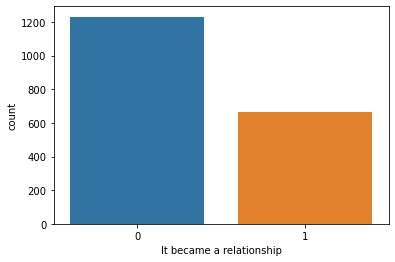

In [9]:
sns.countplot(df['It became a relationship']) 


In [10]:
df.Answer.unique()

array(['No', 'Yes', "I don't use Tinder"], dtype=object)

# Applying label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

number =LabelEncoder()
df["Segment type"]=number.fit_transform(df["Segment type"].astype('str'))
df.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,3,"Meridian, Idaho",No,0.000000,0.000000,0
1,292887.9870,3,"Meridian, Idaho",No,0.000000,0.000000,0
2,292894.0656,0,"Meridian, Idaho",No,499.173606,0.225255,0
3,292887.1180,3,"Meridian, Idaho",No,0.000000,0.000000,0
4,292893.6561,0,"Meridian, Idaho",No,455.925963,0.211360,0


In [12]:

test_data["Segment type"]=number.fit_transform(test_data["Segment type"].astype('str'))
test_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage
0,292974.2311,2,"University of California, Davis",Yes,0.230742,0.115371
1,292889.7996,3,"Meridian, Idaho",No,0.000000,0.000000
2,293724.0350,2,"Westport, CT",Yes,0.000000,0.000000
3,292884.0724,1,"Meridian, Idaho",No,1497.699982,0.388752
4,292882.0964,1,"Meridian, Idaho",No,1439.464988,0.373646


In [13]:
df["Segment Description"]=number.fit_transform(df["Segment Description"].astype('str'))
df["Answer"]=number.fit_transform(df["Answer"].astype('str'))


test_data["Segment Description"]=number.fit_transform(test_data["Segment Description"].astype('str'))

test_data["Answer"]=number.fit_transform(test_data["Answer"].astype('str'))

In [14]:

df.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,292890.8970,3,46,1,0.000000,0.000000,0
1,292887.9870,3,46,1,0.000000,0.000000,0
2,292894.0656,0,46,1,499.173606,0.225255,0
3,292887.1180,3,46,1,0.000000,0.000000,0
4,292893.6561,0,46,1,455.925963,0.211360,0


In [15]:
test_data.head()

,ID,Segment type,Segment Description,Answer,Count,Percentage
0,292974.2311,2,60,2,0.230742,0.115371
1,292889.7996,3,29,1,0.000000,0.000000
2,293724.0350,2,98,2,0.000000,0.000000
3,292884.0724,1,29,1,1497.699982,0.388752
4,292882.0964,1,29,1,1439.464988,0.373646


In [16]:
df.drop('ID',axis=1,inplace=True)
test_data.drop('ID',axis=1,inplace=True)

# Checking correlation between them

In [17]:
corr_matrix = abs(df.corr())
print(corr_matrix["It became a relationship"].sort_values(ascending=False)) 

It became a relationship    1.000000
Percentage                  0.311429
Segment Description         0.258384
Count                       0.186139
Segment type                0.139331
Answer                      0.010539
Name: It became a relationship, dtype: float64


# No need to drop any feature

# Applying models

In [18]:
df.shape,test_data.shape

((1896, 6), (632, 5))

In [19]:
X = df.drop(['It became a relationship'],axis=1)
y = df['It became a relationship']
test = test_data

In [20]:
X.shape,y.shape,test.shape

((1896, 5), (1896,), (632, 5))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state =0)

In [22]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_test)

accuracy_score(y_test,y_pred_rfr)

0.9184210526315789

In [24]:
preds_test = rfr.predict(test)
download_preds(preds_test, file_name='model.csv') 